<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch02_Generatoren/blob/main/06_Bildauschnitte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = "http://pitnoack.de/mn/generator_bildausschnitte/data.zip"
with urlopen(zipurl) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zfile:
    zfile.extractall()

# Credit: https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
from PIL import Image
import os
import random
from matplotlib import pyplot as plt

class ImageGenerator(Sequence):

  # shape (50, 50, 3)

  def __init__(self, dir_, shape, batch_size=25):
    filenames = os.listdir(dir_)
    self.len = int(len(filenames)/batch_size)
    self.shape = shape
    self.batch_size = batch_size
    self.file_paths = [os.path.join(dir_, filename) for filename in filenames]
    random.shuffle(self.file_paths)
    #prüfen, ob die Bilder die rechte Größe haben!!!

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    if index >= self.len:
      raise IndexError("list index out of range")
    else:
      file_paths = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
      batch_x = np.empty((self.batch_size,) + (self.shape), "float32")
      
      # ...

      for idx, file_path in enumerate(file_paths):
        img = Image.open(file_path)
        img_width = img.size[0]
        img_height = img.size[1]

        max_x_offset = img_width - self.shape[0]
        x_offset = random.randint(0, max_x_offset)

        max_y_offset = img_height - self.shape[1]
        y_offset = random.randint(0, max_y_offset)
        img_as_array = np.array(img).astype("float32")/255.0
        #print("img_width", img_width)
        #print("img_height", img_height)
        #print("x_offset", x_offset)
        #print("y_offset", y_offset)
        
        y_low = y_offset
        y_high = y_offset+self.shape[0]
        x_low = x_offset
        x_high = x_offset+self.shape[1]
        cutout_array = img_as_array[y_low:y_high, x_low:x_high, :]
        #plt.imshow(cutout_array)
        #plt.show()
        batch_x[idx] = cutout_array
      return batch_x, batch_x

In [ ]:
dir_ = "/content/data/img_raw"

gen = ImageGenerator(dir_, (48, 48, 3))

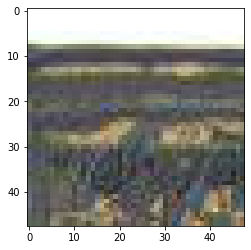

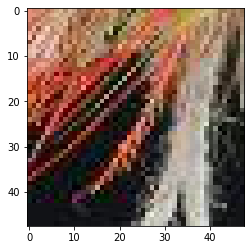

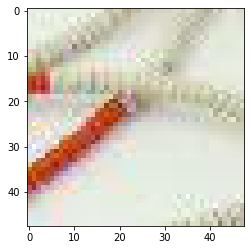

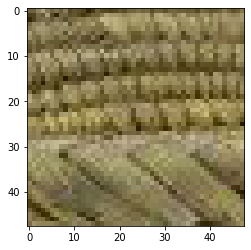

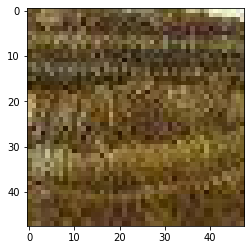

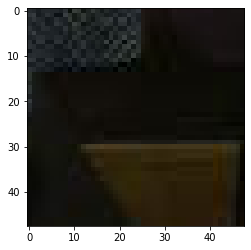

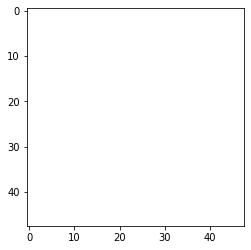

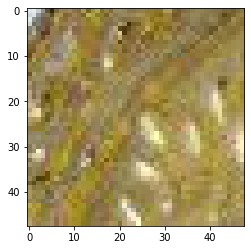

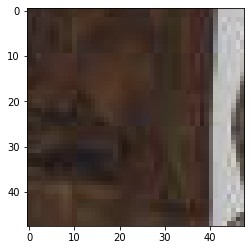

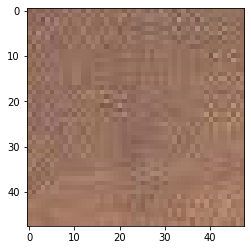

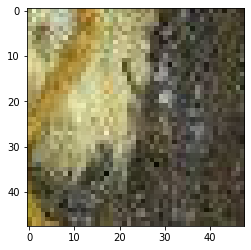

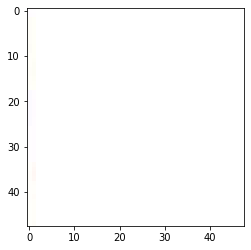

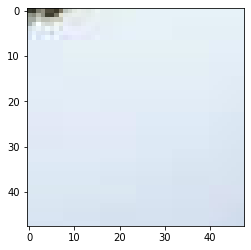

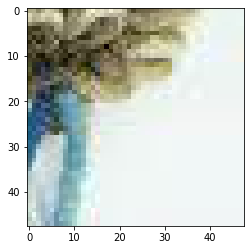

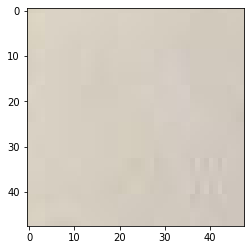

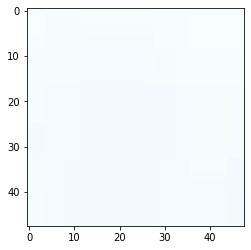

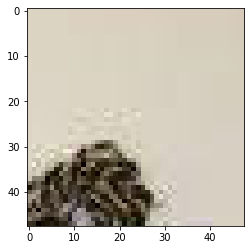

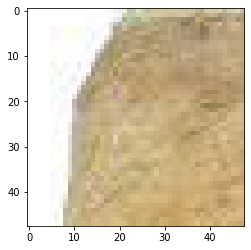

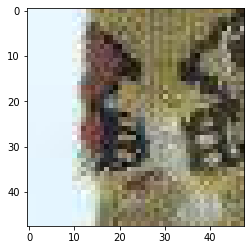

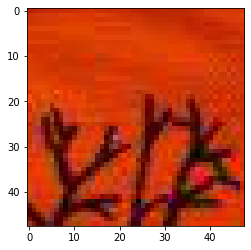

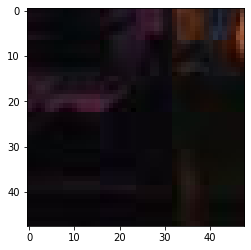

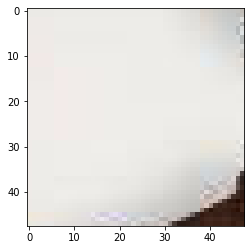

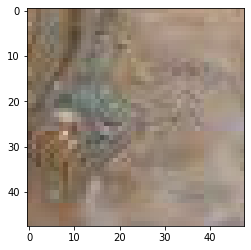

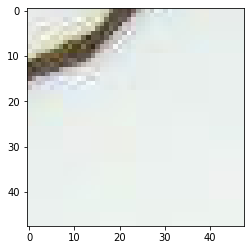

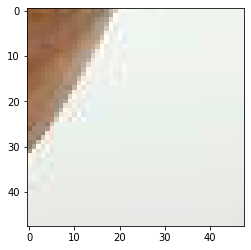

In [ ]:
batch = gen[2]

batch_x = batch[0]

batch_x.shape


for img in batch_x:
  plt.imshow(img)
  plt.show()

In [ ]:
batch = gen[0]



(25, 48, 48, 3)

In [ ]:
x = batch[0]
x.shape

(25, 48, 48, 3)

In [ ]:
y = batch[1]
y.shape

(25, 48, 48, 3)